## Setting up IPython Notebook
The code below simply sets up ipython notebook and displays graphs inline (e.g. as HTML)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Importing Stuff, data set preparation
Next, we import sklearn (must be installed on your system when you run this notebook) and load the data set from sklearn.datasets

In [2]:
import numpy as np
import sklearn.datasets as datasets
ds = datasets.load_boston()

In [3]:
#that is the data 
ds.data

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]])

In [4]:
#it has 13 attributes or features and 506 data points
ds.data.shape

(506, 13)

In [5]:
#and here are the feautre names. note that the last feature name is the target
ds.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

In [6]:
#here are the target values for the 506 data points
ds.target.shape

(506,)

/root/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

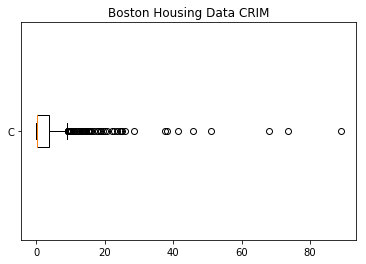

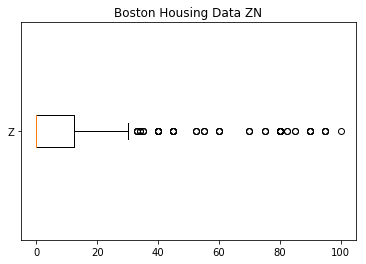

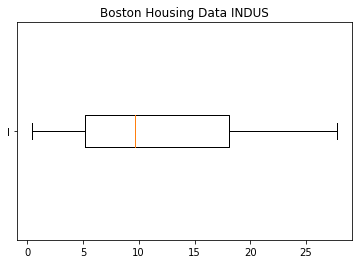

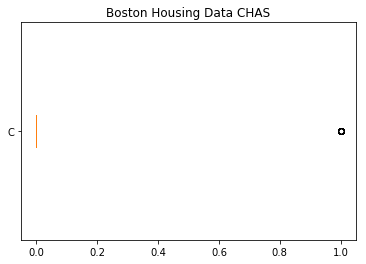

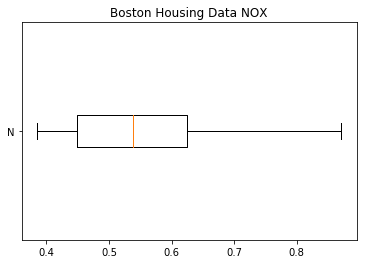

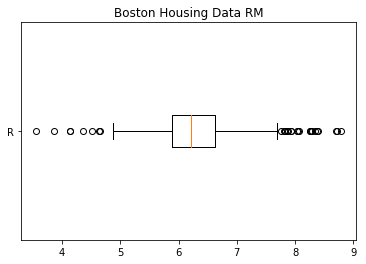

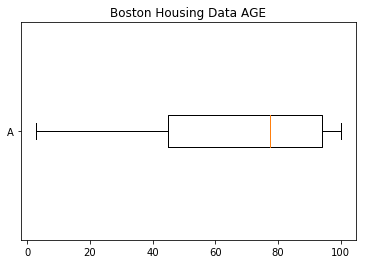

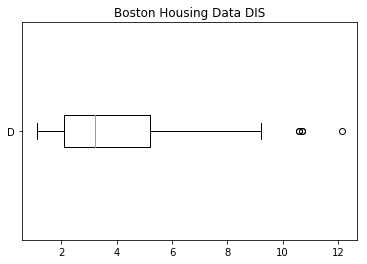

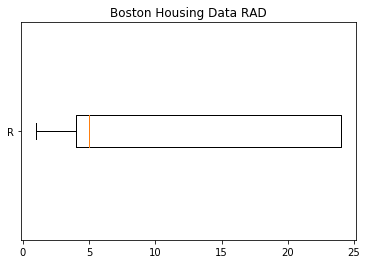

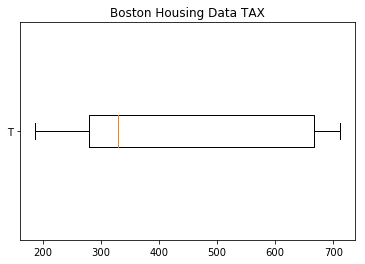

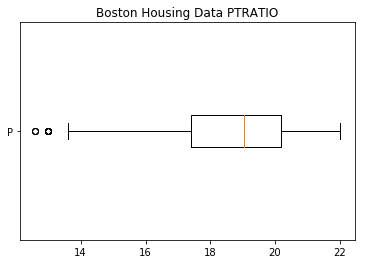

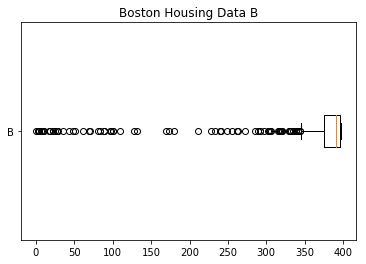

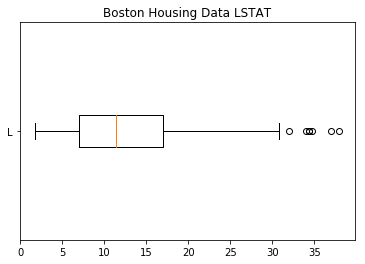

In [7]:
for i in range(ds.data.shape[1]):
    fig = figure()
    ax1 = fig.add_subplot(1,1,1)
    ax1.boxplot(ds.data[:,i],vert=False)
    ax1.set_title("Boston Housing Data "+ds.feature_names[i])
    ax1.set_yticklabels(ds.feature_names[i])
    fig.show()

print (ds.DESCR[:1236])

## Boston Housing and LMS

  * Now apply the lms on the Boston Housing Data
  * Estimate the "goodness of fit" through the sum squared error between prediction and original
  

### Determining House Prices

Consider that you get a good Job in Boston and that you want to buy a house there. Not for all regions the median value of houses is known, so you want to find a method that allows you to judge the value of a house and to see whether estate agent tries to fool you (or not).

The Boston Housing data contains such attributes in order to estimate the value of a region in the Boston suburps.  Variables are

1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
9. TAX: full-value property-tax rate per \$10,000 
9. PTRATIO: pupil-teacher ratio by town 
9. B: $1000(Bk - 0.63)^2$ where Bk is the proportion of blacks by town 
9. LSTAT: % lower status of the population 
9. MEDV: Median value of owner-occupied homes in \$1000's

Attribute number 14. is the dependent variable or target attribute, i.e. the variable we want to predcit. Pracically we want to learn a function

$ MEDV = f(CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT) $

or when we take $x$ as a vector of the attributes we simply write

$MEDV = f(x)$

In [9]:
def lms(data,eta=0.1, iterations=1000, bias=True):
    """
    data: tuple containing the data matrix x and target values c(x)
    eta: learning rate. default is 0.1
    bias: True, if a bias term should be included
    iterations: do some fixed amount of iterations. no need for more sophisticated stopping criterions
    """
    target = data[1]
    data = data[0]
    dim = data.shape[1]         # get the number of attributes/features
    num_points = data.shape[0]
    if bias:                    # when considering the bias term we have to add w_0
        dim+=1
        data = np.concatenate(
                [
                 data, 
                 np.ones(num_points).reshape(num_points,1)
                ]
                ,axis=1)    # add bias term as attribute with value 1 for every data point
    w = np.ones(dim)    # that is the weight vector as column vector    
    for i in range(iterations):
        next = np.random.randint(num_points)  #next example to work on
        predict = np.dot(data[next,],w)       #predict the value of next based on the current hypothesis
        error = target[next]-predict          # estimate the error
        w = w + eta*error*data[next,]         # inner loop is done by numpy
    
    return w

In [10]:
data_zipped = (ds.data,ds.target)
w = lms(data_zipped,iterations=100000,eta=0.000001)
print ("Weights:", w)
print ("Some better output (using python magic)")
for (feature,weight) in zip(ds.feature_names[0:12].tolist()+["w0"],w): print (feature,"\t",weight)

Weights: [-0.12171627  0.10265649  0.29408602  1.02313009  1.0012983   1.28701595
  0.10043993  0.73311132  0.52965397 -0.03023934  0.4649555   0.02060137
 -0.76179036  1.00780485]
Some better output (using python magic)
CRIM 	 -0.121716269954
ZN 	 0.102656487238
INDUS 	 0.294086021137
CHAS 	 1.02313009445
NOX 	 1.00129829511
RM 	 1.28701594931
AGE 	 0.100439929353
DIS 	 0.733111317243
RAD 	 0.529653968975
TAX 	 -0.0302393396845
PTRATIO 	 0.464955501114
B 	 0.0206013722715
w0 	 -0.76179036177


Again, we have to tune $\eta$ in order to avoid divergence. This strongly depends on the scale of the attributes, i.e. large attributes yield large updates. So lets take a look on the scale of the attributes:

In [11]:
print (ds.feature_names)
print (np.min(ds.data,axis=0))
print (np.max(ds.data,axis=0))

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[  6.32000000e-03   0.00000000e+00   4.60000000e-01   0.00000000e+00
   3.85000000e-01   3.56100000e+00   2.90000000e+00   1.12960000e+00
   1.00000000e+00   1.87000000e+02   1.26000000e+01   3.20000000e-01
   1.73000000e+00]
[  88.9762  100.       27.74      1.        0.871     8.78    100.
   12.1265   24.      711.       22.      396.9      37.97  ]


### Normalizing Attributes
In order to enhance parameter settings (in particular $\eta$) and to improve convergence we can rescale (aka centering/standardising) the data set by dividing each attribute through its range ($=max-min$) and subtracting the minimum $min$:

$$
  X = \frac{X-min(X)}{(max(X)-min(X)}
$$

with $max(X)$ and $min(X)$ are column vectors containing the minimum and maximum values of an attribute and / being the element wise division. Such scaling/centering should be part of every preprocessing, as discussed in the Lecture [On the Data](http://www.uni-weimar.de/medien/webis/teaching/lecturenotes/machine-learning/unit-en-data.pdf)

Hence, the attributes are scaled within the range [0:1]

In [12]:
X = ds.data
Y = ds.target
X_scaled = (X-np.min(X,axis=0))/(np.max(X,axis=0)-np.min(X,axis=0))
print (X_scaled)

[[  0.00000000e+00   1.80000000e-01   6.78152493e-02 ...,   2.87234043e-01
    1.00000000e+00   8.96799117e-02]
 [  2.35922539e-04   0.00000000e+00   2.42302053e-01 ...,   5.53191489e-01
    1.00000000e+00   2.04470199e-01]
 [  2.35697744e-04   0.00000000e+00   2.42302053e-01 ...,   5.53191489e-01
    9.89737254e-01   6.34657837e-02]
 ..., 
 [  6.11892474e-04   0.00000000e+00   4.20454545e-01 ...,   8.93617021e-01
    1.00000000e+00   1.07891832e-01]
 [  1.16072990e-03   0.00000000e+00   4.20454545e-01 ...,   8.93617021e-01
    9.91300620e-01   1.31070640e-01]
 [  4.61841693e-04   0.00000000e+00   4.20454545e-01 ...,   8.93617021e-01
    1.00000000e+00   1.69701987e-01]]


### Plotting the Distributions
[Boxplots](http://en.wikipedia.org/wiki/Box_plot) are a good way to show the distribution of attributes in data. Lets compare X and its scaled Version $X_{scale}$


/root/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


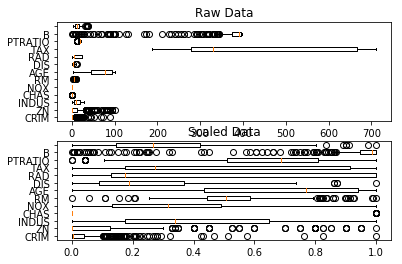

In [13]:
fig = figure()
ax1 = fig.add_subplot(2,1,1)
ax1.boxplot(X,vert=False)
ax2 = fig.add_subplot(2,1,2)
ax2.boxplot(X_scaled,vert=False)
ax2.set_title("Scaled Data")
ax1.set_title("Raw Data")
ax2.set_yticklabels(ds.feature_names[0:12])
ax1.set_yticklabels(ds.feature_names[0:12])
fig.show()

Watch the scales on the x-axis. The distribution of an attribute does not change (see for example TAX), but all attributes are now in the same range.

Scaled data allows for robuster parameter settings and faster convergence:


In [14]:
data_zipped = (X_scaled,ds.target)
w = lms(data_zipped,iterations=100000,eta=0.001)
print ("Weights:", w)
print ("Some better output (using python magic)")
for (feature,weight) in zip(ds.feature_names[0:12].tolist()+["w0"],w): print (feature,"\t",weight)

Weights: [ -3.28666617   2.88756839  -0.21737581   3.20329509  -2.92425854
  24.02260516   1.26106557  -6.31016195   4.20995031  -3.70332985
  -7.222657     5.72303367 -16.96572221  16.26518302]
Some better output (using python magic)
CRIM 	 -3.28666617428
ZN 	 2.88756839219
INDUS 	 -0.217375808213
CHAS 	 3.20329508878
NOX 	 -2.9242585421
RM 	 24.0226051579
AGE 	 1.26106556687
DIS 	 -6.31016194988
RAD 	 4.20995030955
TAX 	 -3.70332985479
PTRATIO 	 -7.22265700082
B 	 5.72303367025
w0 	 -16.9657222102
